In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
from textblob import TextBlob
import random
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
data=pd.read_csv(r"C:\Users\Vaibhav Kumar\Downloads\IPL_2022_tweets.csv",low_memory=False,encoding='utf-8')

In [3]:
data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63,699,False,2022-06-20 22:00:03,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False
1,The Times Of India,New Delhi,News. Views. Analysis. Conversations. India’s ...,2010-04-19 10:50:15,14429584.0,457,6,True,2022-06-20 21:30:00,How fans of @ViratGang @BoldBrigade @Fanaticso...,"['IPL2022', 'RCB', 'MI', 'CSK', 'TOISportscast']",Twitter Web App,False
2,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63,699,False,2022-06-20 20:00:24,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False
3,𝕊𝕠𝕔𝕚𝕒𝕝 𝔸𝕟𝕚𝕞𝕒𝕝,India,I’m here to avoid my friends on Facebook.,2013-10-15 04:34:14,124.0,502,2675,False,2022-06-20 19:10:00,@Chigurupati_H WOW!!\n3 ducks with 3 chicks!!\...,['IPL2022'],Twitter for Android,False
4,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63,699,False,2022-06-20 19:00:18,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
574659,Rohit Sharma FC,NaN,Hii This is an Die Heart Fan Club of Rohit Sharma,2021-08-02 04:05:06,3.0,11.0,219.0,False,2022-01-06 13:05:44,2⃣5⃣ Matches 🏏\n1⃣4⃣2⃣0⃣ Runs 🔥\n2⃣ Centuries ...,"['Mumbaiindians', 'OneFamily', 'CricketMeriJaa...",Twitter for Android,False
574660,Sanket Pandey,India,Proud to be an indian\n-Jay hind.\n-Vande matr...,2017-01-11 13:44:24,14.0,333.0,3844.0,False,2022-01-06 13:04:34,Tough competition 💪😂\n\n.\n#IPL #BCCI #IPL2022...,"['IPL', 'BCCI', 'IPL2022', 'twitter']",Twitter Web App,False
574661,InsideSport,"New Delhi, India",Official website of InsideSport - India's prem...,2017-01-21 11:03:22,5654.0,759.0,7723.0,False,2022-01-06 12:59:46,Lucknow IPL franchise ropes in MyCircle11 as t...,"['IPL2022', 'LucknowIPLTeam', 'IPL']",Twitter Web App,False
574662,Deepanshu Speaks,India,Offical Twitter handle of YouTube channel #Dee...,2021-06-17 14:44:22,11.0,42.0,1479.0,False,2022-01-06 12:52:12,Official conformation : RPSG's Lucknow IPL Tea...,"['TeamLucknow', 'IPL2022']",Twitter for Android,False


In [33]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 22:00:03,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False
1,The Times Of India,New Delhi,News. Views. Analysis. Conversations. India’s ...,2010-04-19 10:50:15,14429584.0,457.0,6.0,True,2022-06-20 21:30:00,How fans of @ViratGang @BoldBrigade @Fanaticso...,"['IPL2022', 'RCB', 'MI', 'CSK', 'TOISportscast']",Twitter Web App,False
2,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 20:00:24,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False
3,𝕊𝕠𝕔𝕚𝕒𝕝 𝔸𝕟𝕚𝕞𝕒𝕝,India,I’m here to avoid my friends on Facebook.,2013-10-15 04:34:14,124.0,502.0,2675.0,False,2022-06-20 19:10:00,@Chigurupati_H WOW!!\n3 ducks with 3 chicks!!\...,['IPL2022'],Twitter for Android,False
4,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 19:00:18,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False


In [49]:
data.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment_score
574659,Rohit Sharma FC,NaN,Hii This is an Die Heart Fan Club of Rohit Sharma,2021-08-02 04:05:06,3.0,11.0,219.0,False,2022-01-06 13:05:44,2⃣5⃣ Matches 🏏\n1⃣4⃣2⃣0⃣ Runs 🔥\n2⃣ Centuries ...,"['Mumbaiindians', 'OneFamily', 'CricketMeriJaa...",Twitter for Android,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
574660,Sanket Pandey,India,Proud to be an indian\n-Jay hind.\n-Vande matr...,2017-01-11 13:44:24,14.0,333.0,3844.0,False,2022-01-06 13:04:34,Tough competition 💪😂\n\n.\n#IPL #BCCI #IPL2022...,"['IPL', 'BCCI', 'IPL2022', 'twitter']",Twitter Web App,False,"{'neg': 0.111, 'neu': 0.889, 'pos': 0.0, 'comp..."
574661,InsideSport,"New Delhi, India",Official website of InsideSport - India's prem...,2017-01-21 11:03:22,5654.0,759.0,7723.0,False,2022-01-06 12:59:46,Lucknow IPL franchise ropes in MyCircle11 as t...,"['IPL2022', 'LucknowIPLTeam', 'IPL']",Twitter Web App,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
574662,Deepanshu Speaks,India,Offical Twitter handle of YouTube channel #Dee...,2021-06-17 14:44:22,11.0,42.0,1479.0,False,2022-01-06 12:52:12,Official conformation : RPSG's Lucknow IPL Tea...,"['TeamLucknow', 'IPL2022']",Twitter for Android,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
574663,Aakash Srivastava,"Noida, India",Writer with @SportsTiger,2016-09-10 08:31:12,103.0,2022.0,1557.0,False,2022-01-06 12:51:05,"He believes In basics, and feels sticking to t...","['venkateshiyer', 'INDvsSA', 'viratkholi', 'KL...",Twitter Web App,False,"{'neg': 0.0, 'neu': 0.94, 'pos': 0.06, 'compou..."


In [52]:
data.isnull().sum()

user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
is_retweet          0
sentiment_score     0
dtype: int64

In [5]:
data.describe()

,user_followers
count,5.746490e+05
mean,1.120746e+05
std,7.588829e+05
min,0.000000e+00
25%,3.900000e+01
50%,2.030000e+02
75%,1.142000e+03
max,2.011137e+07


In [7]:
data.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [37]:
data.describe(include='all')

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
count,574660,384107,492536,574655,5.746490e+05,574649.0,574649.0,574649,574649,574649,574620,574640,574640
unique,63167,13172,61803,65122,NaN,11393.0,62983.0,7,451296,480197,135736,160,1
top,KGF Beast,India,Get latest cricket scores,2017-08-09 11:38:02,NaN,0.0,0.0,False,2022-04-27 17:57:51,@ViCustomerCare A13) 3 Sixes\n\n#ViFanOfTheMat...,['IPL2022'],Twitter for Android,False
freq,3191,51775,3368,3368,NaN,3593.0,4663.0,348778,15,76,49487,386808,574640
mean,NaN,NaN,NaN,NaN,1.120746e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,7.588829e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,3.900000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2.030000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.142000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
data.shape

(574664, 13)

In [39]:
data.info

<bound method DataFrame.info of                  user_name     user_location   
0       World Cricket Baba             india  \
1       The Times Of India         New Delhi   
2       World Cricket Baba             india   
3            𝕊𝕠𝕔𝕚𝕒𝕝 𝔸𝕟𝕚𝕞𝕒𝕝             India   
4       World Cricket Baba             india   
...                    ...               ...   
574659     Rohit Sharma FC               NaN   
574660       Sanket Pandey             India   
574661         InsideSport  New Delhi, India   
574662    Deepanshu Speaks             India   
574663   Aakash Srivastava      Noida, India   

                                         user_description   
0       ! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...  \
1       News. Views. Analysis. Conversations. India’s ...   
2       ! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...   
3               I’m here to avoid my friends on Facebook.   
4       ! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...   
...                      

In [53]:
data.isnull().sum() 

user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
is_retweet          0
sentiment_score     0
dtype: int64

In [56]:
data.shape

(348215, 14)

In [51]:
data.dropna(inplace=True)

In [44]:
data.isnull().sum()

user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
is_retweet          0
dtype: int64

In [45]:
data.shape

(348215, 13)

# ANALYSIS AND VISUALIZATION

In [8]:
data.groupby('user_location')['user_description'].value_counts()[0:31]

user_location                   user_description                                                                                                                                            
\tயாதும் ஊரே யாவரும் கேளிர் 🤝   அடி ஆத்தாடி நான் பாட்டாளி\nஉன் கூட்டாளி                                                                                                                           4
                                We don’t pray for Love We just pray for God!🙏🏽                                                                                                                    5
                                Ugly Rotten soul. Bad person. Not worth following. Follow panra alavukku inga onnum illa bro                                                                      4
                                |||DREAM11 FANTASY PLAYER||\n\n ||MYFAB11 FANTASY PLAYER||\n\n|| CrICkE™  🏏 LøV€®™ 🏏. ||\n\n|| Møß¡L€ G@M€®||\n\n||M@©Th ®€pøT€®||™🚴‍♀️🏟\n\nDAILY FREE TEAMS      2
                           

In [9]:
data['is_retweet'].value_counts()

is_retweet
False    574640
Name: count, dtype: int64

In [27]:
data.groupby('user_location')['user_followers'].value_counts()[0:51]

user_location                   user_followers
\tயாதும் ஊரே யாவரும் கேளிர் 🤝   134.0               3
                                132.0               1
                                145.0               4
                                65.0                3
                                3121.0              2
                                1.0                 1
                                3.0                 1
                                5.0                 1
                                30.0                1
                                31.0                1
                                66.0                1
                                67.0                1
                                72.0                1
                                93.0                1
                                105.0               1
                                151.0               1
                                304.0               1
                                504

In [60]:
data.groupby('date') ['text'].value_counts()[0:31]

date                 text                                                                                                                                                                                                                                                                                                              
2022-01-06 12:51:05  He believes In basics, and feels sticking to that is working well with me. \n\nCheck out excerpts of an interview with #venkateshiyer \n\nhttps://t.co/Yes1m6Lw70\n\n@BCCI @klrahul11 @imVkohli @KKRiders @sportstigerapp \n\n#INDvsSA #viratkholi #KLRahul #IPL2022 #IPL #vijayhazaretrophy                          1
2022-01-06 12:52:12  Official conformation : RPSG's Lucknow IPL Team ropes in My11Circle as title sponsor for three years. \n\n#TeamLucknow #IPL2022                                                                                                                                                                                       1
2022-0

In [28]:
data.groupby('user_name')['user_followers'].value_counts()[0:11]

user_name                                                                              user_followers
 Harish kumar                                                                          53.0              1
 hold fast to Constitutional methods of achieving our social and economic objectives.  180.0             1
!                                                                                      197.0             1
                                                                                       194.0             1
! die hard fans of faf !™️                                                             262.0             1
! हम भारतीय ! We The Bharatiya !🇮🇳                                                     122.0             1
!! NAVNEET RAI❤🥃                                                                       428.0             1
                                                                                       411.0             1
!! عالم پٹھان!!                           

In [30]:
data['user_verified'].value_counts()

user_verified
False                                                                                                                                               530516
True                                                                                                                                                 44130
Rinku singh is looking so confident &amp; promising. Back him @KKRiders. #KKRvsRR #IPL2022 #KKR https://t.co/EmxqaIXdyQ                                  1
Witnessing some of the worst fielding and catch drops in #IPL2022. Something abnormal.                                                                   1
#IPL2022 Drinking Water Shortage in Wankhede today 22/4/2022. Outside Water not allowed. Inside water not available. 1/2 https://t.co/AY1NKsT2uy         1
Name: count, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'False'),
  Text(1, 0, 'True'),
  Text(2, 0, 'Rinku singh is looking so confident &amp; promising. Back him @KKRiders. #KKRvsRR #IPL2022 #KKR https://t.co/EmxqaIXdyQ'),
  Text(3, 0, 'Witnessing some of the worst fielding and catch drops in #IPL2022. Something abnormal.'),
  Text(4, 0, '#IPL2022 Drinking Water Shortage in Wankhede today 22/4/2022. Outside Water not allowed. Inside water not available. 1/2 https://t.co/AY1NKsT2uy')])

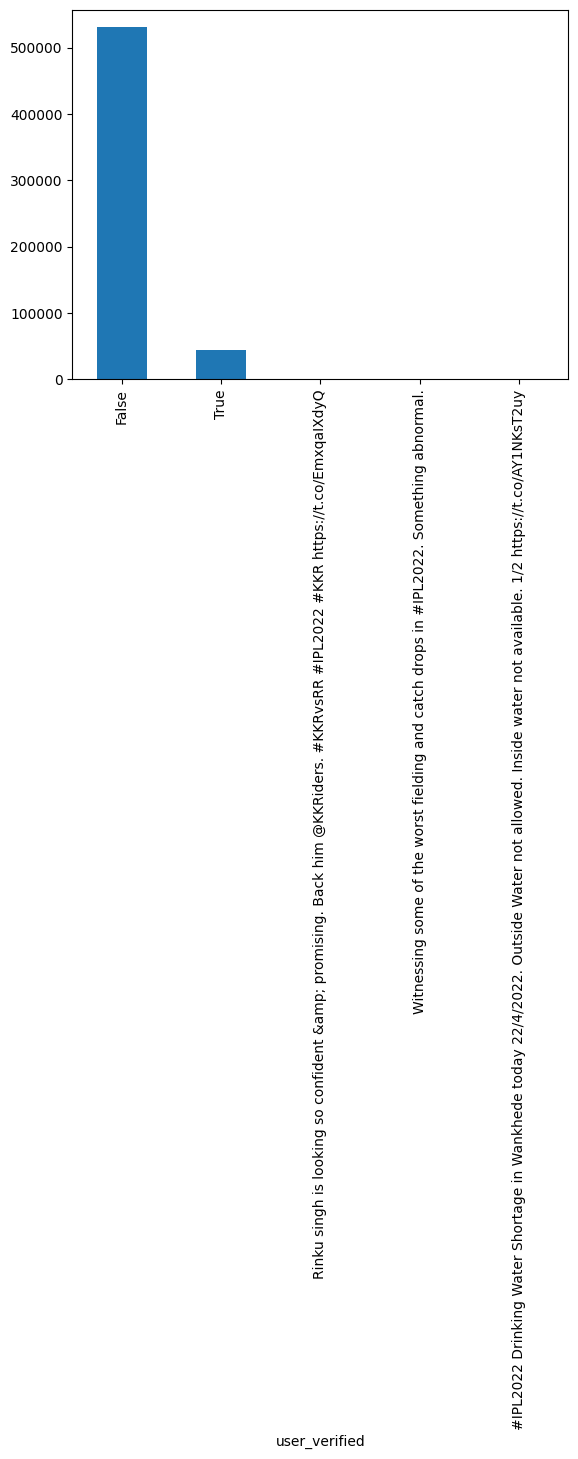

In [15]:
# Draw the bar plot to user_verified?
data.user_verified.value_counts().plot(kind='bar', rot=0)
plt.xticks(rotation=90)

In [14]:
data['user_friends'].value_counts()[0:21]

user_friends
0.0      4212
1.0      2957
3.0      2663
72.0     2575
262.0    2423
4.0      2090
349.0    2027
2.0      2025
31.0     1864
8.0      1790
13.0     1709
44.0     1610
7.0      1597
15.0     1526
35.0     1476
10.0     1475
19.0     1457
56.0     1456
33.0     1455
25.0     1450
5.0      1410
Name: count, dtype: int64

In [ ]:
# barplot of user_friends?
plt.figure(figsize=(10,5))
data['user_friends'].value_counts()[0:21].plot(kind="bar")
plt.show()

In [ ]:
# Using Pie chart ?
plt.figure(figsize=(15,10))
plt.pie(list(data['user_location'].value_counts())[0:11],labels=list(data['user_location'].value_counts().keys())[0:11],autopct="%0.1f%%",counterclock=False,
       )

plt.show()

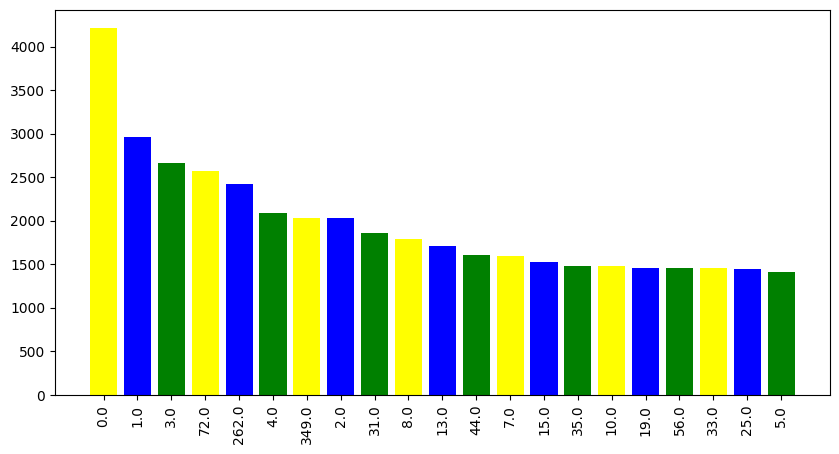

In [20]:
# Bar plot of hashtags?
plt.figure(figsize=(10,5))
plt.bar(list(data['user_friends'].value_counts().keys())[0:21],list(data['user_friends'].value_counts())[0:21],color=["Yellow","blue","green"])
plt.xticks(rotation=90)
plt.show()

In [22]:
data.groupby('user_followers')['source'].value_counts()[0:11]

user_followers  source             
0.0             Twitter for Android    6521
                Twitter Web App        2446
                Twitter for iPhone      631
                Instagram                12
                Twitter for iPad         10
                Buffer                    7
                TweetDeck                 6
                Twitter for Mac           4
                Blog2Social APP           3
                IFTTT                     1
                Tweetbot for iΟS          1
Name: count, dtype: int64

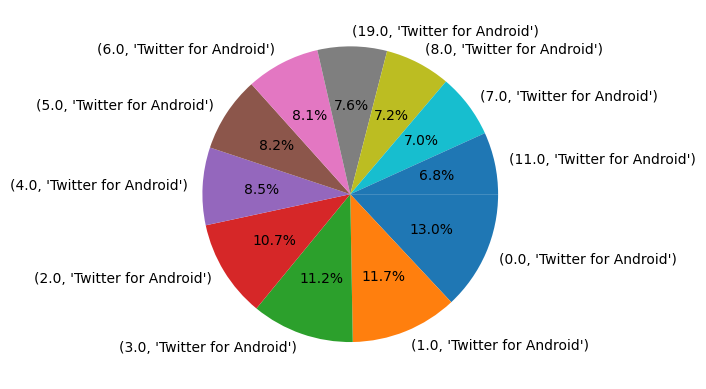

In [23]:
# Using Pie chart are user_followers and source?
plt.pie(list(data[['user_followers','source']].value_counts())[0:11],labels=list(data[['user_followers','source']].value_counts().keys())[0:11],autopct="%0.1f%%",counterclock=False)
plt.show()

In [6]:
data['user_location'].value_counts()

user_location
India                      51775
Mumbai, India              22524
New Delhi, India           21879
Kolkata, India              9554
Bengaluru, India            6250
                           ...  
जालोर, भारत                    1
Memphis, TN                    1
Southampton, Hampshire         1
Stockport                      1
 Gopalganj ,patna india        1
Name: count, Length: 13172, dtype: int64

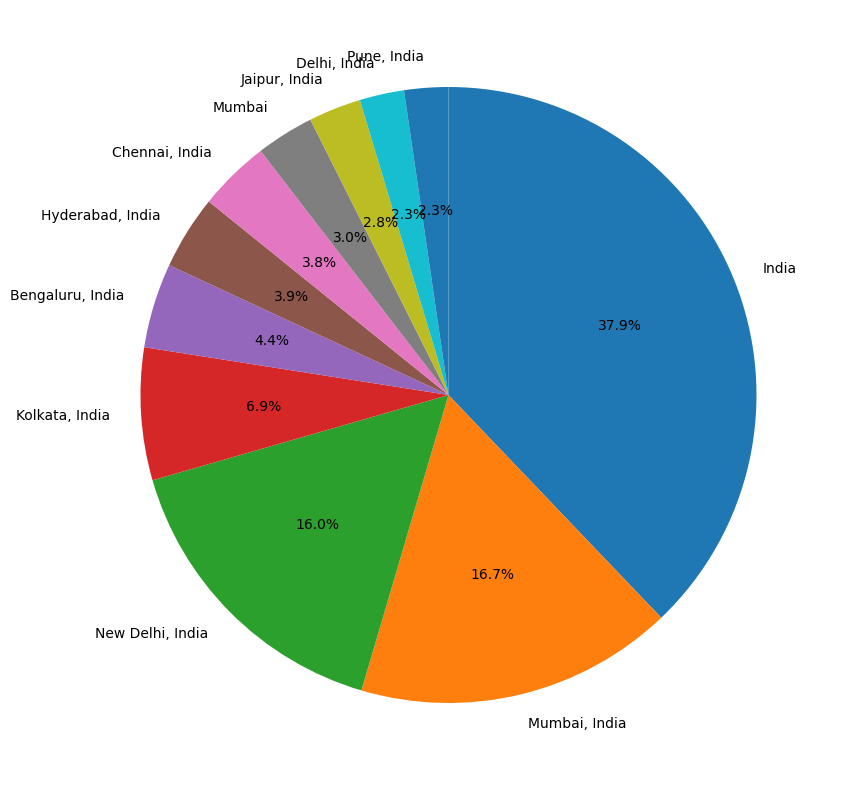

In [89]:
# Using Pie chart to find the percentage of user_location?
plt.figure(figsize=(15,10))
plt.pie(list(data['user_location'].value_counts())[0:11],labels=list(data['user_location'].value_counts().keys())[0:11],autopct="%0.1f%%",counterclock=False,
        startangle=90)

plt.show()

In [16]:
data['hashtags'].value_counts()[0:21]

hashtags
['IPL2022']                                   49487
['ViFanOfTheMatch', 'IPL2022', 'LSGvCSK']     12165
['ViFanOfTheMatch', 'IPL2022', 'KKRvPBKS']     9429
['ViFanOfTheMatch', 'IPL2022', 'CSKvRCB']      9035
['ViFanOfTheMatch', 'IPL2022', 'RCBvKKR']      8525
['ViFanOfTheMatch', 'IPL2022', 'MIvPBKS']      8349
['ViFanOfTheMatch', 'IPL2022', 'LSGvRCB']      7986
['ViFanOfTheMatch', 'IPL2022', 'RRvGT']        7919
['ViFanOfTheMatch', 'IPL2022', 'DCvRR']        7849
['ViFanOfTheMatch', 'IPL2022', 'CSKvPBKS']     7789
['ViFanOfTheMatch', 'IPL2022', 'SRHvGT']       7662
['ViFanOfTheMatch', 'IPL2022', 'MIvCSK']       7452
['ViFanOfTheMatch', 'IPL2022', 'PBKSvLSG']     7437
['ViFanOfTheMatch', 'IPL2022', 'PBKSvCSK']     7243
['ViFanOfTheMatch', 'IPL2022', 'GTvDC']        7085
['ViFanOfTheMatch', 'IPL2022', 'RRvMI']        7016
['ViFanOfTheMatch', 'IPL2022', 'GTvSRH']       6884
['ViFanOfTheMatch', 'IPL2022', 'DCvPBKS']      6743
['ViFanOfTheMatch', 'IPL2022', 'MIvLSG']       6018
['V

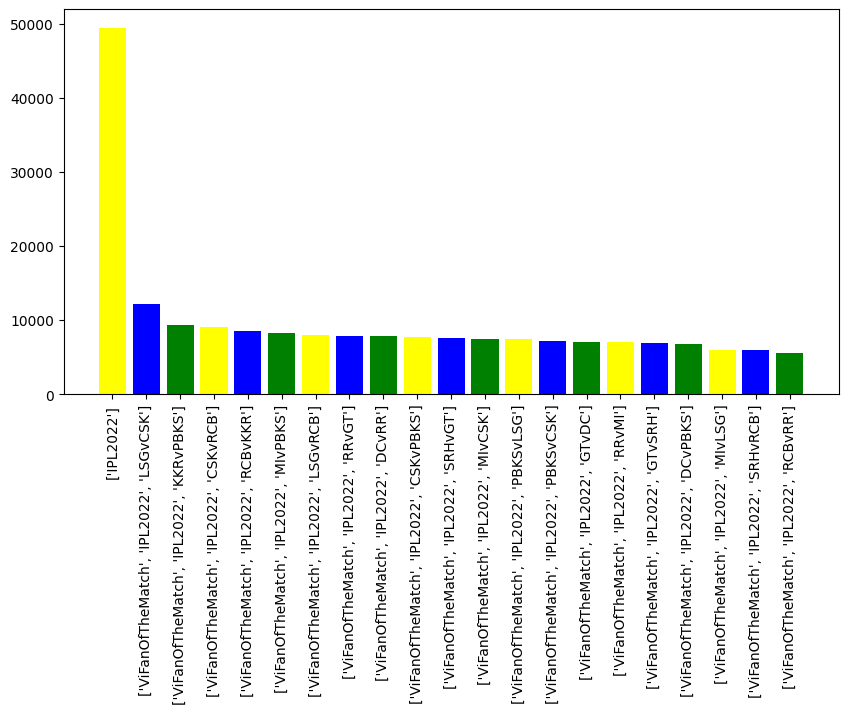

In [17]:
# Bar plot of hashtags?
plt.figure(figsize=(10,5))
plt.bar(list(data['hashtags'].value_counts().keys())[0:21],list(data['hashtags'].value_counts())[0:21],color=["Yellow","blue","green"])
plt.xticks(rotation=90)
plt.show()

In [8]:
data.groupby('source')['hashtags'].value_counts()

source               hashtags                                                                                
24liveblog           ['IPL2022', 'IPLAuction']                                                                   2
                     ['IPL2021', 'IPL2022', 'IPLAuction']                                                        1
                     ['iplmegaauction', 'ipl2022']                                                               1
                     ['ipl2022', 'IPLMegaAuction']                                                               1
                     ['IPLMEGAAUCTION', 'IPL2022']                                                               1
                                                                                                                ..
tweechaPrime         ['IPL2022', 'PBKSvCSK']                                                                     3
                     ['IPL2022', 'GTvSRH']                                           

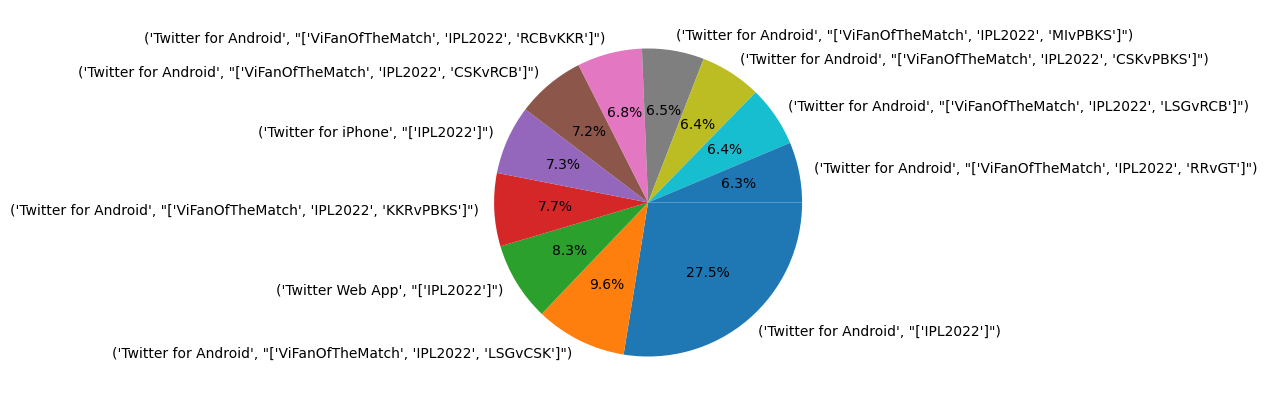

In [22]:
# Using Pie chart to find the source and hashtags?
plt.figure(figsize=(10,5))
plt.pie(list(data[['source','hashtags']].value_counts())[0:11],labels=list(data[['source','hashtags']].value_counts().keys())[0:11],autopct="%0.1f%%",counterclock=False,
       )

plt.show()

# FINDING OUT THAT USER IS VERIFIED OR NOT

In [25]:
# Calculating the proportion of verified users
verified_users = data['user_verified'].value_counts(normalize=True) * 100

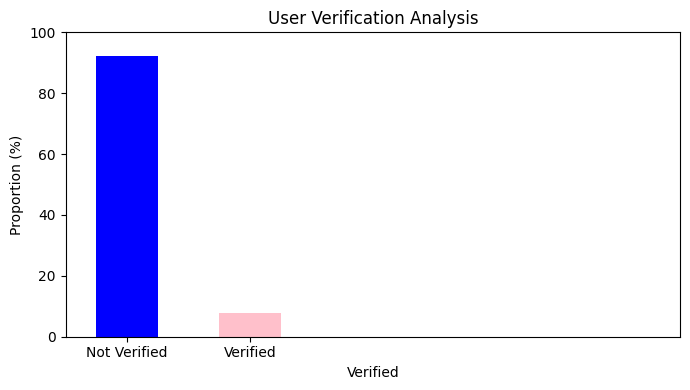

In [27]:
# Plotting the analysis
plt.figure(figsize=(7, 4))
verified_users.plot(kind='bar', color=['blue','pink'])
plt.title('User Verification Analysis')
plt.xlabel('Verified')
plt.ylabel('Proportion (%)')
plt.xticks([0, 1], ['Not Verified', 'Verified'], rotation=0)
plt.ylim(0, 100)
plt.tight_layout()

# Show the plot
plt.show()

# FINDING OUT THAT WHICH TWEET IS RETWEET OR NOT.

In [7]:
# Calculating the percentage of retweets
retweet_percentage = (data['is_retweet'].sum() / len(data)) * 100

In [9]:
# Calculating the percentage of original tweets
original_tweet_percentage = 100 - retweet_percentage

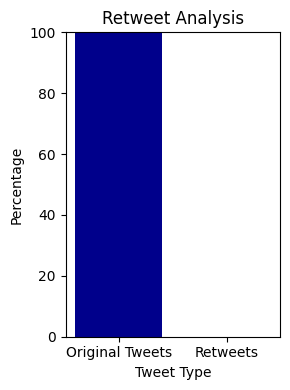

In [15]:
# Plotting the analysis
plt.figure(figsize=(3, 4))
plt.bar(['Original Tweets', 'Retweets'], [original_tweet_percentage, retweet_percentage], color=['darkblue', 'gray'])
plt.title('Retweet Analysis')
plt.xlabel('Tweet Type')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.tight_layout()

# Show the plot
plt.show()

# FINDING OUT THE SOURCE OF TWEETS.

In [60]:
# Create a frequency count of tweet sources
source_counts = data['source'].value_counts().head(10)

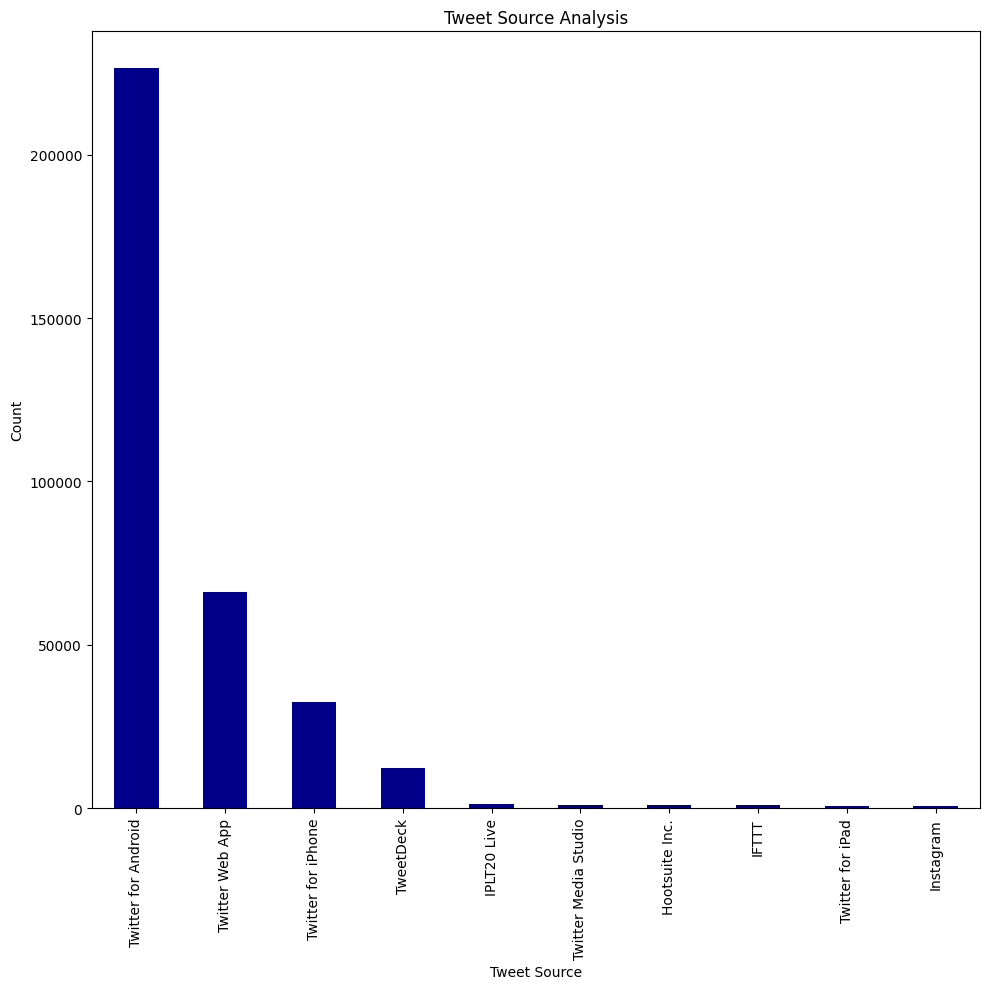

In [61]:
# Plotting the graph
plt.figure(figsize=(10, 10))
source_counts.plot(kind='bar', color='darkblue')
plt.xlabel('Tweet Source')
plt.ylabel('Count')
plt.title('Tweet Source Analysis')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

# FINDING OUT THE NATURE OF TWEETS

In [63]:
# Performing sentiment analysis on each tweet
data['sentiment'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [64]:
# Categorizing sentiments
data['sentiment_category'] = data['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

In [66]:
# Calculating the percentage of positive, negative, and neutral tweets
sentiment_counts = data['sentiment_category'].value_counts(normalize=True) * 100

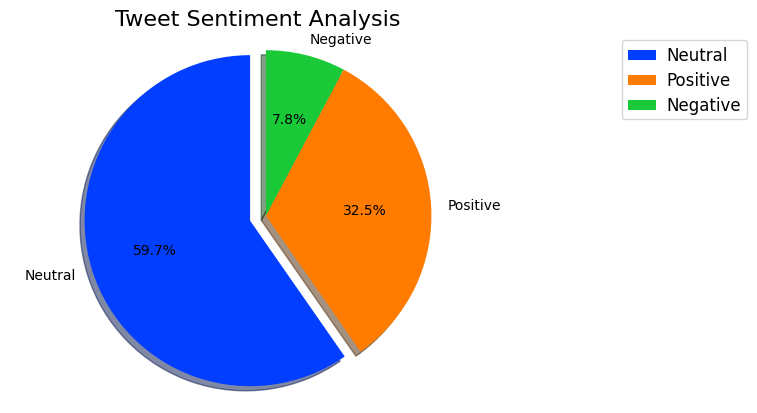

In [79]:
colors = sns.color_palette('bright', len(sentiment_counts))

# Creating a pie chart with 90-degree start angle and custom color palette
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
        startangle=90, shadow=True, explode=(0.1, 0, 0), colors=colors)

# Adding a title and legend
plt.title('Tweet Sentiment Analysis', fontsize=16)
plt.legend(sentiment_counts.index, loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))

# Making the plot a perfect circle
plt.axis('equal')

# Increasing font size of labels and percentages
plt.setp(plt.gca().get_xticklabels(), fontsize=12)
plt.setp(plt.gca().get_yticklabels(), fontsize=12)
plt.setp(plt.gca().get_legend().get_texts(), fontsize=12)

# Show the plot
plt.show()

# FINDING OUT THE NUMBER OF TWEETS PER HOUR

In [71]:
# Converting 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

In [73]:
# Extracting hour and day of the week
data['hour'] = data['date'].dt.hour
data['day_of_week'] = data['date'].dt.day_name()

In [75]:
# Calculating tweet count by hour
hourly_tweet_counts = data['hour'].value_counts().sort_index()

In [77]:
# Calculating tweet count by day of the week
daily_tweet_counts = data['day_of_week'].value_counts()

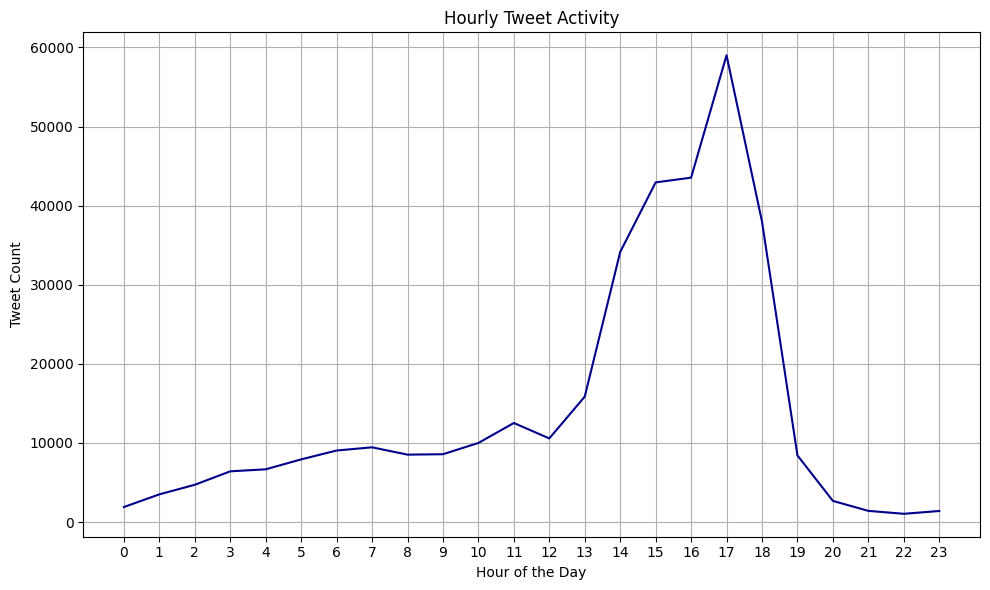

In [78]:
# Plotting the hourly tweet activity
plt.figure(figsize=(10, 6))
hourly_tweet_counts.plot(kind='line', color='darkblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Tweet Count')
plt.title('Hourly Tweet Activity')
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()